# Wavefront Expansion - Power Series

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')


## Create a set of 2D points in a circular aperture

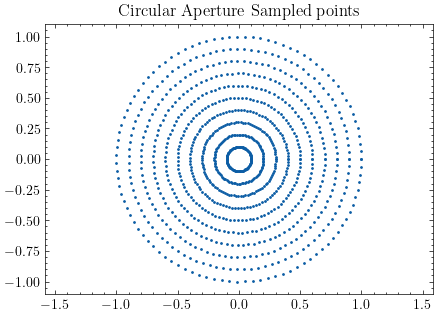

In [39]:
# function to define a radially symmetric set of 2D points with n rings and m points per ring
def aperture_rings(n_rings, n_points_per_ring, radius, center):
    
    points = []
    angles = np.linspace(0, 2*np.pi, n_points_per_ring)
    for i in range(n_rings):
        # create a set of points for a single ring  
        r = (i+1) * radius / n_rings
        x = center[0] + r * np.cos(angles)
        y = center[1] + r * np.sin(angles)
        ring_points = np.array([x, y]).T
        points.append(ring_points)
    points = np.concatenate(points)  

    return points


# create and plot the points
num_rings = 10
num_pts_per_ring = 100

plt.figure(figsize=(5,3.5))
pts = aperture_rings(num_rings, num_pts_per_ring, 1, [0, 0])
plt.scatter(pts[:,0], pts[:,1], s=1)
plt.axis('equal')
plt.title('Circular Aperture Sampled points')
plt.show()


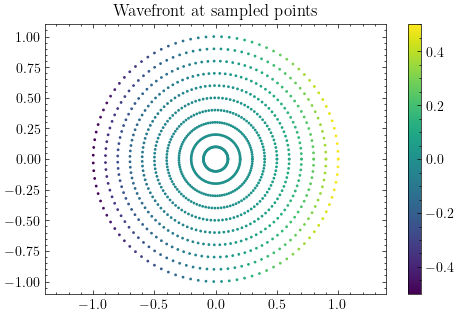

In [42]:
# define a wavefront expansion function, W_ijk = W * H**i * r**j cos**k(theta)
W = [1,3,1]  

def wavefront(r, theta, W, H):
    result = 1
    if W[0] > 0: result *= H ** W[0]
    if W[1] > 0: result *= r ** W[1]
    if W[2] > 0: result *= np.cos(theta)**W[2]
    
    return result

# create a wavefront expansion for a set of aperture points
def wavefront_expansion(aperture_points, W, H):
    r = np.sqrt(aperture_points[:,0]**2 + aperture_points[:,1]**2)
    theta = np.arctan2(aperture_points[:,1], aperture_points[:,0])
    return wavefront(r, theta, W, H)

# apply a wavefront expansion to the aperture_rings function
#W = [0,2,0]
W = [1,3,1]
H = .5
wavefronts = wavefront_expansion(pts, W, H)

# plot the wavefront expansion
plt.figure(figsize=(5.5,3.5))
plt.scatter(pts[:,0], pts[:,1], c=wavefronts,s=1)
plt.axis('equal')
plt.title('Wavefront at sampled points')
plt.colorbar()
plt.show()


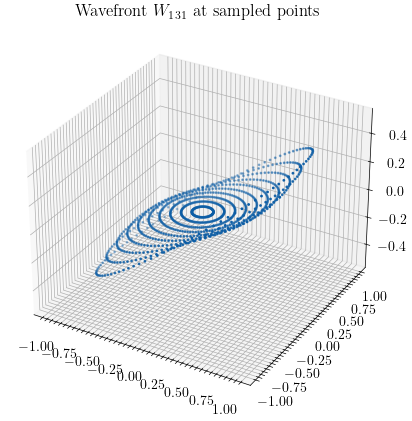

In [64]:
# plot the wavefront in 3D
from mpl_toolkits.mplot3d import Axes3D
I,J,K = W[0],W[1],W[2]
fig = plt.figure(figsize=(5.5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:,0], pts[:,1], wavefronts,s=1)
plt.title(f"Wavefront $W_{I}$$_{J}$$_{K}$ at sampled points")
plt.show()


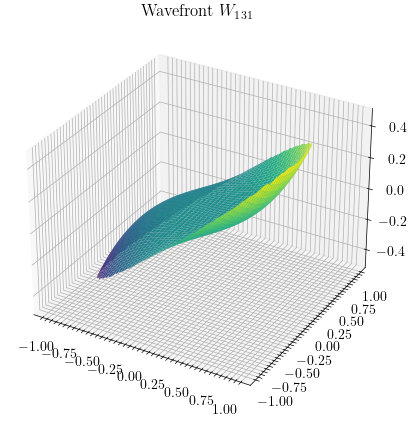

In [67]:
# plot the wavefront in 3D as a surface
from scipy.interpolate import griddata

x = pts[:,0]
y = pts[:,1]
z = wavefronts

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
xig, yig = np.meshgrid(xi, yi)
ax.plot_surface(xig, yig, zi, cmap='viridis')
plt.title(f"Wavefront $W_{I}$$_{J}$$_{K}$")
plt.show()


In [86]:
# plot the 3d surface in plotly instead of matplotlib for interactivity
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi)])
# set the aspect ratio and size
fig.update_layout(width=600, height=600)
fig.show()





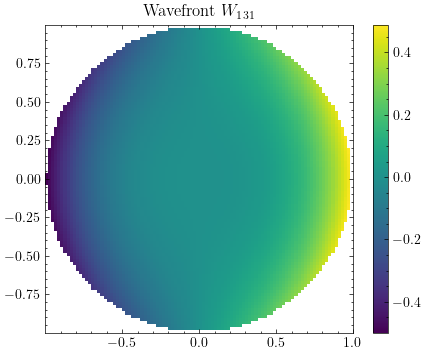

In [74]:
# plot the wavefront in 2d as an intensity map
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
plt.figure(figsize=(5,4))
plt.imshow(zi, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='viridis')
plt.title(f"Wavefront $W_{I}$$_{J}$$_{K}$")
plt.colorbar()
plt.show()
